In [2]:
import pandas as pd

In [4]:
df = pd.read_csv("../input/mnist_train.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 359.3 MB


In [5]:
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Check if the data in skewed(unbalanced)

In [1]:
import seaborn as sns

Text(0, 0.5, 'count')

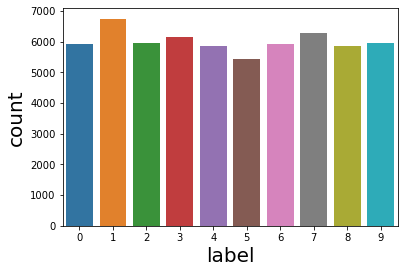

In [6]:
b = sns.countplot(x='label', data=df)
b.set_xlabel("label", fontsize=20)
b.set_ylabel("count", fontsize=20)

## Data is not skewed, use stratified-kfold anyway

In [7]:
# we create a new column called kfold and fill it with -1
df["kfold"] = -1

In [8]:
# the next step is to randomize the rows of the data
df = df.sample(frac=1).reset_index(drop=True)

In [9]:
# fetch targets
y = df.label.values

In [10]:
from sklearn import model_selection

In [11]:
# initiate the kfold class from model_selection module
kf = model_selection.StratifiedKFold(n_splits=5)

In [12]:
# fill the new kfold column
for f, (t_, v_) in enumerate(kf.split(X=df, y=y)):
    df.loc[v_, 'kfold'] = f

In [13]:
df.kfold.unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [ ]:
# save the new csv with kfold column
df.to_csv("mnist_train_folds.csv", index=False)